In [ ]:
###Importing data and getting it ready###

In [1]:
import pandas as pd

In [2]:
Gisette_train_X = pd.read_table("C:\\Users\\sraba\\OneDrive\\Documents\\ML_Barbu\\Datasets\\Gisette\\gisette_train.data",
                                header=None, sep=" ")

In [3]:
del Gisette_train_X[Gisette_train_X.columns[-1]]

In [4]:
Gisette_train_Y = pd.read_table("C:\\Users\\sraba\\OneDrive\\Documents\\ML_Barbu\\Datasets\\Gisette\\gisette_train.labels",
                                header=None, sep=" ")

In [5]:
Gisette_test_X = pd.read_table("C:\\Users\\sraba\\OneDrive\\Documents\\ML_Barbu\\Datasets\\Gisette\\gisette_valid.data",
                                header=None, sep=" ")

In [6]:
del Gisette_test_X[Gisette_test_X.columns[-1]]

In [7]:
Gisette_test_Y = pd.read_table("C:\\Users\\sraba\\OneDrive\\Documents\\ML_Barbu\\Datasets\\Gisette\\gisette_valid.labels",
                                header=None, sep=" ")

In [ ]:
###Pre-processing data###

In [8]:
from sklearn import preprocessing

In [9]:
scaler = preprocessing.StandardScaler().fit(Gisette_train_X)

In [10]:
Gisette_train_X = pd.DataFrame(scaler.transform(Gisette_train_X))

In [11]:
Gisette_test_X = pd.DataFrame(scaler.transform(Gisette_test_X))

In [12]:
Gisette_train_Y.loc[Gisette_train_Y[0]==-1] = 0

In [13]:
Gisette_test_Y.loc[Gisette_test_Y[0]==-1] = 0

In [ ]:
#Training a logistic regression learning model by gradient ascent###

In [14]:
import numpy as np

In [15]:
L_rate = 0.47 #Learning rate
Lambda = 0.001 #parameter of gaussian prior
N = 6000 #Number of observations
P = 5000 #Number of features
W = pd.DataFrame(np.zeros((1, 5000))) #weights

In [16]:
store = []

for i in range(300):
    
    XWT = Gisette_train_X.dot(pd.DataFrame.transpose(W))
    exp = np.exp(XWT)
    Z = exp/(1+exp)
    gradient = (pd.DataFrame.transpose(Gisette_train_X)).dot(Gisette_train_Y-Z)
    gradient = pd.DataFrame.transpose(gradient)
    W = W - L_rate*Lambda*W + (L_rate/N)*gradient
    
    A = (pd.DataFrame.transpose(Gisette_train_Y)).dot(XWT)
    B = (np.log(1+exp)).sum()
    log_likelihood = float(A.iloc[0])-float(B)
    store.append(log_likelihood)

In [ ]:
#Plotting number of iteartions versus log-likelihood function

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'log-likelihood')

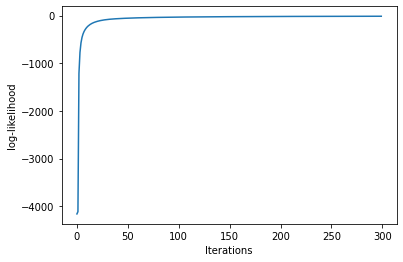

In [18]:
plt.plot(store)
plt.xlabel('Iterations')
plt.ylabel('log-likelihood')

In [19]:
store

[-4158.883083359672,
 -4112.1445375099065,
 -1212.6770916788082,
 -774.0002781031362,
 -572.0198737320025,
 -459.1857138798514,
 -386.87703861357295,
 -336.08595273591345,
 -297.5605453021162,
 -266.49335603644795,
 -241.01205027391188,
 -219.88755574852985,
 -202.07156406113063,
 -186.82541646750906,
 -173.63264541606623,
 -162.12082561421266,
 -152.02098053083682,
 -143.12564576401564,
 -135.2530625803156,
 -128.2386170608188,
 -121.9432894545098,
 -116.25623561204702,
 -111.09063642343608,
 -106.37924447981277,
 -102.07095416386073,
 -98.12739589501143,
 -94.5188630189914,
 -91.21973694098415,
 -88.20458398343544,
 -85.44642424602716,
 -82.91743805968144,
 -80.59076143781931,
 -78.44189563407053,
 -76.44926393409332,
 -74.59417464577564,
 -72.86054096025327,
 -71.23455320364155,
 -69.70437106476675,
 -68.25984792102463,
 -66.89228520598408,
 -65.59421437873243,
 -64.35920548461218,
 -63.181701597939536,
 -62.05687784739348,
 -60.98052295540401,
 -59.948940688569564,
 -58.95886841673

In [20]:
Pred_train = pd.DataFrame(np.where(Gisette_train_X.dot(pd.DataFrame.transpose(W))>0,1,0))

In [21]:
Pred_train_prob = np.exp(Gisette_train_X.dot(pd.DataFrame.transpose(W)))/(1+np.exp(Gisette_train_X.dot(pd.DataFrame.transpose(W))))

In [22]:
Pred_test = pd.DataFrame(np.where(Gisette_test_X.dot(pd.DataFrame.transpose(W))>0,1,0))

In [23]:
Pred_test_prob = np.exp(Gisette_test_X.dot(pd.DataFrame.transpose(W)))/(1+np.exp(Gisette_test_X.dot(pd.DataFrame.transpose(W))))

In [ ]:
###AUC, ROC, Confusion Matrix etc.###

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import jaccard_score

In [25]:
auc_score_train = roc_auc_score(Gisette_train_Y, Pred_train)
print('Train data ROC AUC=%.3f' % (auc_score_train))
auc_score_test = roc_auc_score(Gisette_test_Y, Pred_test)
print('Test data ROC AUC=%.3f' % (auc_score_test))

Train data ROC AUC=1.000
Test data ROC AUC=0.981


In [26]:
train_fp, train_tp, _ = roc_curve(Gisette_train_Y, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(Gisette_test_Y, Pred_test_prob)

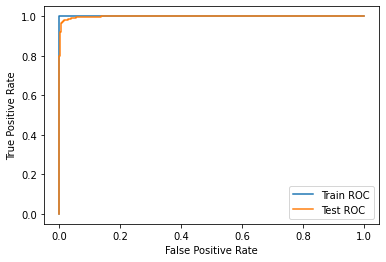

In [27]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
CM_train = confusion_matrix(Gisette_train_Y, Pred_train)
error_train = (CM_train[0][1]+CM_train[1][0])/CM_train.sum()

In [30]:
CM_test = confusion_matrix(Gisette_test_Y, Pred_test)
error_test = (CM_test[0][1]+CM_test[1][0])/CM_test.sum()

In [31]:
from tabulate import tabulate

In [32]:
headers = ['train/test', 'error']   
table = zip(['train','test'],[error_train,error_test])
print(tabulate(table, headers=headers))

train/test      error
------------  -------
train           0
test            0.019


In [33]:
#tried this but was not sure of the results
#error_train = 1 - jaccard_score(Gisette_train_Y, Pred_train)

In [34]:
#tried this but was not sure of the results
#error_test = 1 - jaccard_score(Gisette_test_Y, Pred_test)